**Context**

This dataset groups the customers of a bank. The objective is to find clusters of similar clients and identify certain main type of customers.

**Solution**

The solution utilizes the KMedoids algorithm with the Gower distance as metric due to the presence of relevant categorical features. The number of cluster is selected through the silhouette score, which is the chosen performance metric. Randomized Search Cross Validation is used to find sub-optimal parameters (Gower distance weights and number of clusters).

**Results**

The algorithm propose 9 cluster with an average silhouette score on the test set of 0.88. From a business perspective we can unite some of these clusters since the differences between them aren't related to the business aim. The final proposed business solution is composed by 6 different clusters.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preliminary-data-analysis" data-toc-modified-id="Preliminary-data-analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preliminary data analysis</a></span><ul class="toc-item"><li><span><a href="#Data-visualization" data-toc-modified-id="Data-visualization-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data visualization</a></span><ul class="toc-item"><li><span><a href="#Categorical-features" data-toc-modified-id="Categorical-features-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Categorical features</a></span></li><li><span><a href="#Continous-features" data-toc-modified-id="Continous-features-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Continous features</a></span></li></ul></li><li><span><a href="#Correlation-panel" data-toc-modified-id="Correlation-panel-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Correlation panel</a></span></li></ul></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Clustering</a></span><ul class="toc-item"><li><span><a href="#Building-the-model" data-toc-modified-id="Building-the-model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Building the model</a></span></li><li><span><a href="#Clusters-visualization-through-tSNE" data-toc-modified-id="Clusters-visualization-through-tSNE-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Clusters visualization through tSNE</a></span></li></ul></li><li><span><a href="#Business-analysis" data-toc-modified-id="Business-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Business analysis</a></span><ul class="toc-item"><li><span><a href="#Pie-Plots-of-categorical-variables" data-toc-modified-id="Pie-Plots-of-categorical-variables-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Pie Plots of categorical variables</a></span><ul class="toc-item"><li><span><a href="#Summary-of-the-clusters-division-for-categorical-variables:" data-toc-modified-id="Summary-of-the-clusters-division-for-categorical-variables:-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Summary of the clusters division for categorical variables:</a></span></li></ul></li><li><span><a href="#BoxPlot-for-continous-variables" data-toc-modified-id="BoxPlot-for-continous-variables-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>BoxPlot for continous variables</a></span><ul class="toc-item"><li><span><a href="#Final-cluster-proposal-from-a-business-perspective:" data-toc-modified-id="Final-cluster-proposal-from-a-business-perspective:-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Final cluster proposal from a business perspective:</a></span></li></ul></li></ul></li><li><span><a href="#Evaluation-on-the-test-set" data-toc-modified-id="Evaluation-on-the-test-set-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evaluation on the test set</a></span></li></ul></div>

# Preliminary data analysis

The dataset features are the following:

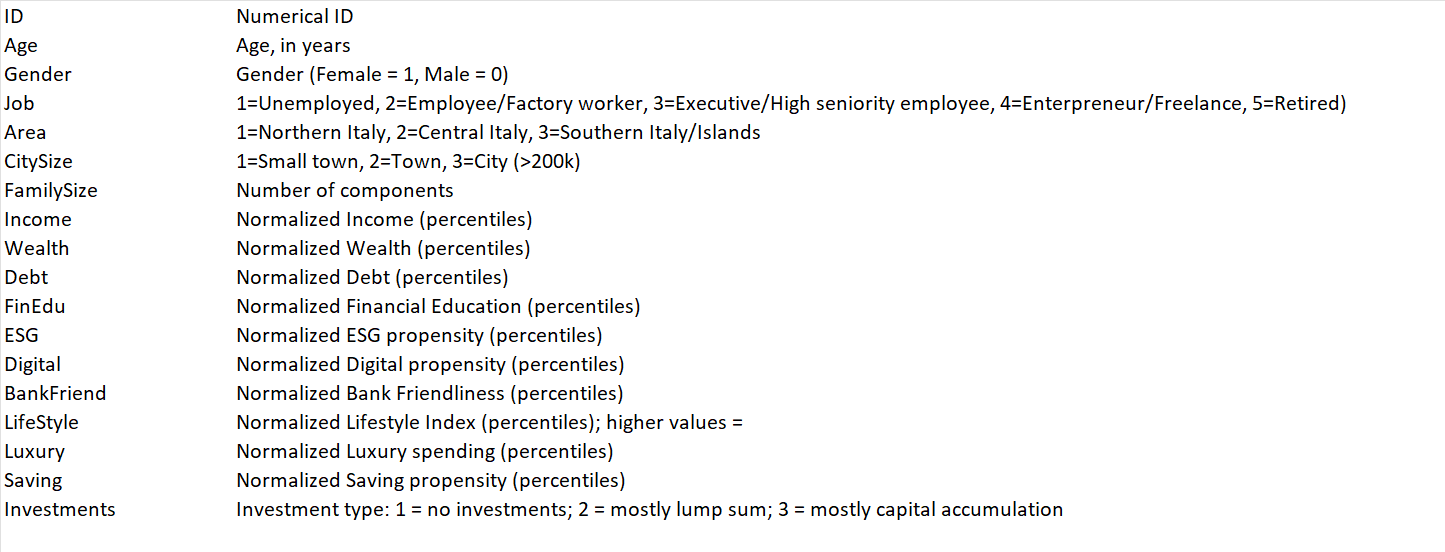

In [1]:
import pandas as pd

df = pd.read_excel('BankClients.xlsx', header=0)
df

,ID,Age,Gender,Job,Area,CitySize,FamilySize,Income,Wealth,Debt,FinEdu,ESG,Digital,BankFriend,LifeStyle,Luxury,Saving,Investments
0,1,24,1,1,2,2,4,0.668046,0.702786,0.262070,0.741853,0.483684,0.698625,0.618259,0.607877,0.897369,0.283222,1
1,2,47,1,2,2,3,1,0.858453,0.915043,0.730430,0.859423,0.537167,0.959025,0.785936,0.862271,0.913729,0.821590,3
2,3,38,0,2,1,2,2,0.926818,0.898316,0.441272,0.485953,0.649434,0.750265,0.699725,0.755404,0.765199,0.503790,3
3,4,67,0,2,1,2,3,0.538797,0.423180,0.600401,0.493144,0.533829,0.590165,0.675353,0.334432,0.517209,0.691240,2
4,5,33,0,2,1,3,1,0.806659,0.731404,0.831449,0.856286,0.784940,0.710026,0.758793,0.908878,0.611610,0.615916,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,53,1,3,1,3,2,0.885471,0.534661,0.770399,0.746182,0.765611,0.823639,0.543243,0.801524,0.636120,0.776405,3
4996,4997,90,1,5,1,1,4,0.655382,0.271317,0.114485,0.421563,0.591364,0.609389,0.677272,0.387290,0.481525,0.208846,2
4997,4998,77,1,2,1,3,1,0.698357,0.833386,0.292712,0.277196,0.864571,0.706673,0.688205,0.736855,0.476645,0.449406,3
4998,4999,84,0,2,1,2,2,0.898275,0.827659,0.403069,0.652992,0.768886,0.795571,0.746251,0.532479,0.891367,0.641447,3


ID is'nt useful for our analysis so we drop it.

In [2]:
df=df.drop(labels='ID' , axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          5000 non-null   int64  
 1   Gender       5000 non-null   int64  
 2   Job          5000 non-null   int64  
 3   Area         5000 non-null   int64  
 4   CitySize     5000 non-null   int64  
 5   FamilySize   5000 non-null   int64  
 6   Income       5000 non-null   float64
 7   Wealth       5000 non-null   float64
 8   Debt         5000 non-null   float64
 9   FinEdu       5000 non-null   float64
 10  ESG          5000 non-null   float64
 11  Digital      5000 non-null   float64
 12  BankFriend   5000 non-null   float64
 13  LifeStyle    5000 non-null   float64
 14  Luxury       5000 non-null   float64
 15  Saving       5000 non-null   float64
 16  Investments  5000 non-null   int64  
dtypes: float64(10), int64(7)
memory usage: 664.2 KB


## Data visualization

Let's head to data visualization, but first let's create a dataframe more suited to this topic by changing the numerical values in the categorical variables with the category that they represent.

In [3]:
dfN = df.copy()

dfN.loc[dfN["Gender"] == 0, "Gender"] = "Male"
dfN.loc[dfN["Gender"] == 1, "Gender"] = "Female"

dfN.loc[dfN["Job"] == 1, "Job"] = "Unemployed"
dfN.loc[dfN["Job"] == 2, "Job"] = "Employee/Worker"
dfN.loc[dfN["Job"] == 3, "Job"] = "Executive"
dfN.loc[dfN["Job"] == 4, "Job"] = "Enterpreneur/Freelance"
dfN.loc[dfN["Job"] == 5, "Job"] = "Retired"

dfN.loc[dfN["Area"] == 1, "Area"] = "Northern Italy"
dfN.loc[dfN["Area"] == 2, "Area"] = "Central Italy"
dfN.loc[dfN["Area"] == 3, "Area"] = "Southern Italy/Islands"

dfN.loc[dfN["CitySize"] == 1, "CitySize"] = "Small town"
dfN.loc[dfN["CitySize"] == 2, "CitySize"] = "Town"
dfN.loc[dfN["CitySize"] == 3, "CitySize"] = "City (>200k)"

dfN.loc[dfN["Investments"] == 1, "Investments"] = "No investments"
dfN.loc[dfN["Investments"] == 2, "Investments"] = "Mostly lump sum"
dfN.loc[dfN["Investments"] == 3, "Investments"] = "Mostly capital accumulation"

### Categorical features

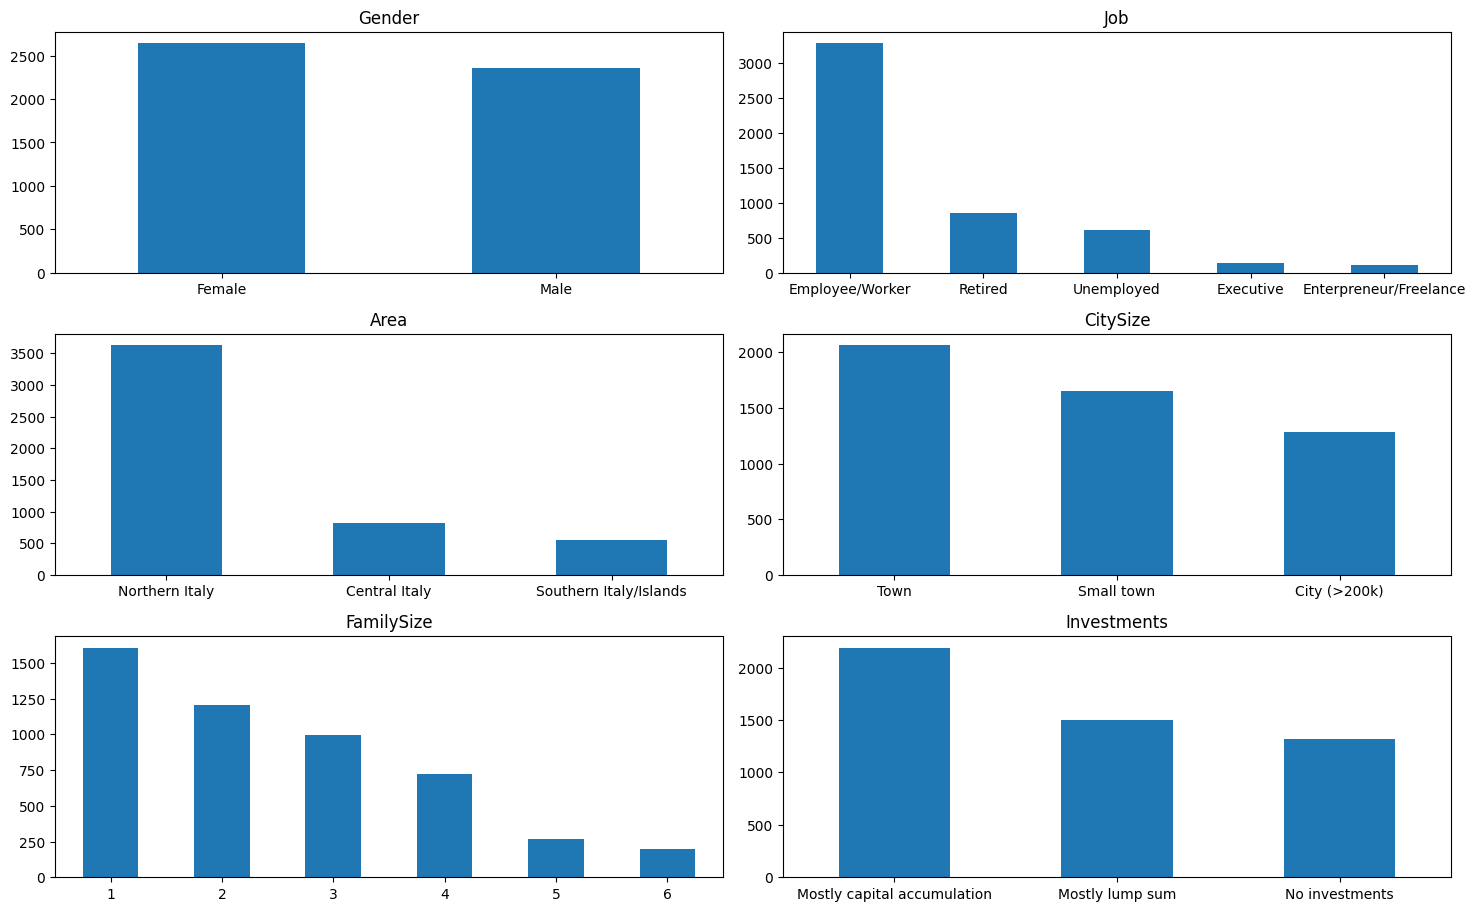

In [4]:
import matplotlib.pyplot as plt

categorical = ["Gender", "Job", "Area", "CitySize", "FamilySize", "Investments"]

plt.figure(figsize = (15,12))
for i,variable in enumerate(categorical):
    plt.subplot(4,2,i+1)
    plt.title(variable)
    dfN[variable].value_counts().plot(kind='bar')
    plt.xticks(rotation='horizontal')
    
plt.tight_layout()
plt.show()

All the categories looks consistent, except for Executive and Enterpreneur/Freelance in the variable job, but we won't see improvements by deleting them or aggregating them to other categories, since they are so different. 

### Continous features

Now let's plot histograms of numerical features.

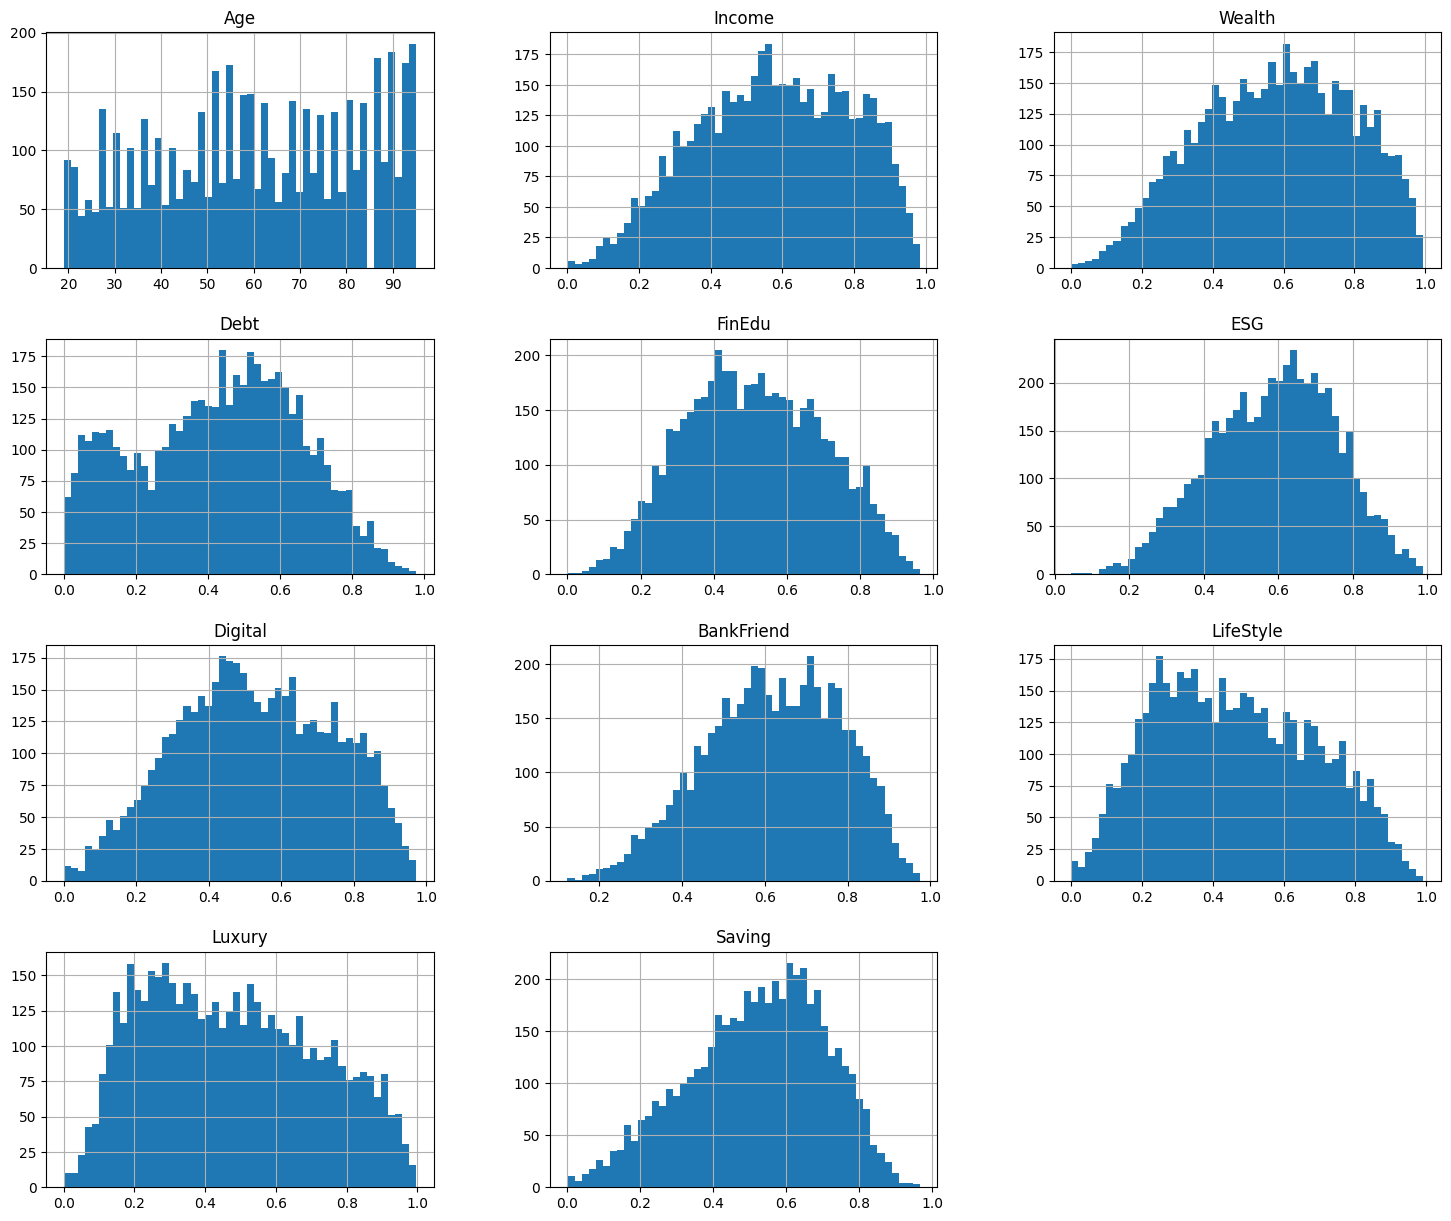

In [5]:
continous = ["Age","Income", "Wealth", "Debt", "FinEdu", "ESG", "Digital", "BankFriend" , "LifeStyle" , "Luxury" , "Saving"]

df[continous].hist(bins=50, figsize=(18, 15))
plt.show()

All features looks pretty good a part from age which is very messy and doesn't look like any known distribution. We choose then to transform it into a categorical variable which indicates the age group the instance belongs to.  The age groups are splitted by 20 years differences:

In [6]:
continous = ["Income", "Wealth", "Debt", "FinEdu", "ESG", "Digital", "BankFriend" , "LifeStyle" , "Luxury" , "Saving"]
df["AgeBucket"] = df["Age"]//20 *20
df["AgeBucket"].value_counts()

40    1341
60    1314
80    1261
20    1032
0       52
Name: AgeBucket, dtype: int64

Since the first age group is very poor in observation we group it with the second one:

In [7]:
df["AgeBucket"] = df["AgeBucket"].where(df["AgeBucket"] !=0 , 20)
df = df.drop(columns = ["Age"])

Now we update even the dataset for visualization and plot AgeBucket barplot:

In [8]:
dfN = dfN.drop(columns = ["Age"]).copy()
dfN["AgeBucket"] = df["AgeBucket"]

dfN.loc[dfN["AgeBucket"] == 20, "AgeBucket"] = "18-39 years"
dfN.loc[dfN["AgeBucket"] == 40, "AgeBucket"] = "40-59 years"
dfN.loc[dfN["AgeBucket"] == 60, "AgeBucket"] = "60-79 years"
dfN.loc[dfN["AgeBucket"] == 80, "AgeBucket"] = "80-99 years"

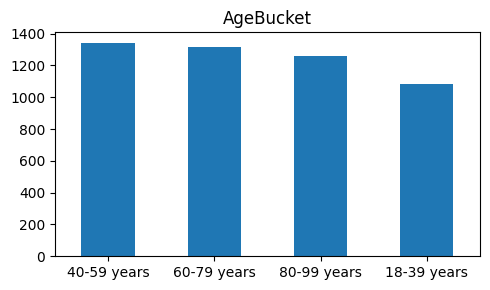

In [9]:
categorical = ["Gender", "Job", "Area", "CitySize", "FamilySize", "Investments", "AgeBucket"]

plt.figure(figsize = (5,3))
plt.title("AgeBucket")
dfN["AgeBucket"].value_counts().plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.tight_layout()
plt.show()

Let's reorder the columns and create a train/test split:

In [10]:
df = df[categorical + continous]

In [11]:
from sklearn.model_selection import train_test_split

rs = 17 #random state

X_train, X_test = train_test_split(df, test_size = 0.1, random_state = rs)
d = X_train.shape[1] #Number of features

## Correlation panel

Finally we plot the correlation matrix of numerical features:

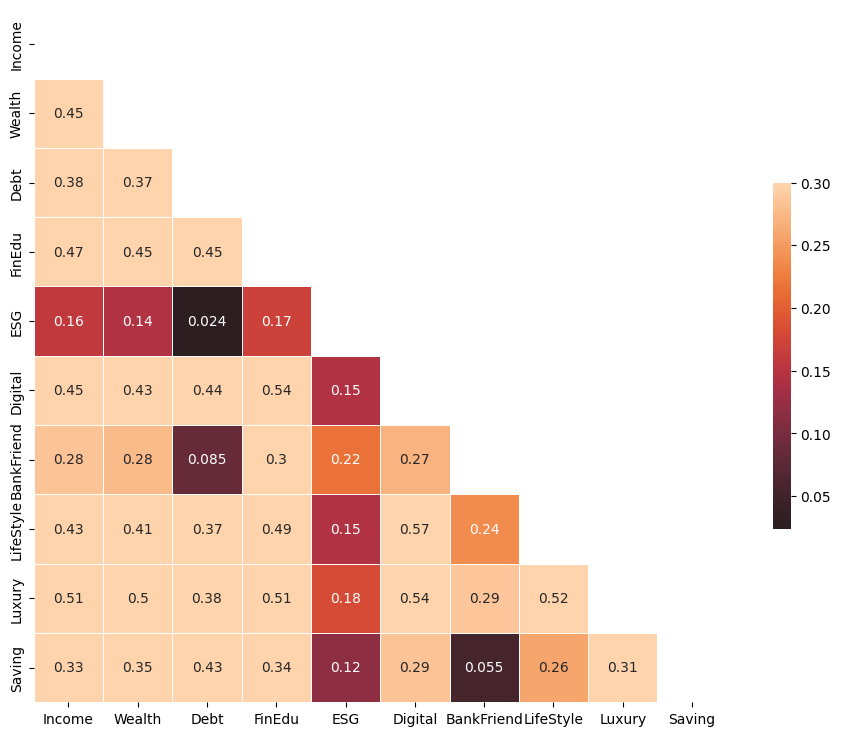

In [12]:
import seaborn as sns
import numpy as np

corr = X_train[continous].corr()

plt.figure(figsize = (12,9))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

A part from ESG and BankFriend all the variables have correlation coefficients bigger than 0.3; the strongest relationships are formed by the group Income, Wealth, Financial education, Lifestyle and Luxury, as we could expect.

# Clustering

Now we are ready to build our model; to create the clusters we will use KMedoids with the Gower distance due to the meaningful categorical variables, hence we have the problem of selecting the optimal number of clusters and finding the optimal weights for the Gower distance, where for optimality we mean the parameters that maximizes the chosen performance metric which is the silhouette score; we will solve this problem by creating a pipeline composed by:
- a sklearn based transformer GowerMatrix that transforms the dataset into the Gower distance design matrix.
- the KMedoids class

then we will use random search cross-validation to find sub-optimal parameters. 

## Building the model

First we create the GowerMatrix transformer:

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from gower import gower_matrix

class GowerMatrix(BaseEstimator, TransformerMixin):
    def __init__(self, cat_features, weight):
        self.cat_features = cat_features
        self.weight = weight
    
    def fit(self, X, y=None):
        self.X_train = X  # fit on the entire training set
        return self
     
    def transform(self, X, y=None, pred = None):
        if pred == True: return gower_matrix(X, cat_features=self.cat_features, weight=self.weight)
        return gower_matrix(X, self.X_train, cat_features=self.cat_features, weight=self.weight)
        # During transform returns the training design matrix 
        # During predict it returns the test/train design matrix
        # During scoring it returns the test design matrix

Now we create the pipeline:

In [14]:
from sklearn.pipeline import Pipeline
from sklearn_extra.cluster import KMedoids

cat_features = np.array([1 for i in categorical] + [0 for i in continous]) # to be passed to the gower function
weight = np.array([1 for i in range(d)]) # initial weight

pipe = Pipeline([
    ("gow", GowerMatrix(cat_features = cat_features, weight = weight)),
    ("KM", KMedoids(n_clusters = 3, init = "k-medoids++", metric = "precomputed", random_state=rs))
])

before fitting, we build the scoring function since the sklearn function silhouette_score isn't a RandomizedSearchCV scorer:

In [15]:
from sklearn.metrics import silhouette_score
def silhouette_scorer(estimator, X):
    labels = estimator.predict(X)
    distance_matrix = estimator["gow"].transform(X, pred = True)
    score = silhouette_score(distance_matrix, labels, metric = 'precomputed')
    return score

Now we use RandomizedSearchCV, noticing that this isn't nor the fastest nor the optimal solution:

- it isn't the fastest solution since we are computing the design matrix for each k (n_clusters) which is expensive.
A faster solution would be obtained by building our function for cv manully, breaking down the pipeline; in this way we compute the design matrix one time for a given set of weights and we can test it for different values of k obtaining the silhouette scores for each of these values (and not just one as in the following implementation).

- it isn't the best solution since we could use BayesSearchCV (but we have to optimize 18 parameter which are a lot).

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import numpy as np

weight_space = uniform([0 for _ in range(d)], [3 for _ in range(d)])
k_range = randint(5,11)

search_space = {
    'gow__weight': weight_space,
    'KM__n_clusters': k_range
}

search = RandomizedSearchCV(
    pipe,
    search_space,
    n_iter = 100,
    scoring=silhouette_scorer,
    cv=3,
    n_jobs=-1,
    random_state=rs
)

search.fit(X_train)

print("Best hyperparameters:", search.best_params_)
print("Best cross-validation score:", search.best_score_)

Best hyperparameters: {'KM__n_clusters': 9, 'gow__weight': array([1.67217352, 2.71729147, 1.70714445, 1.77750762, 2.71911936,
       2.01611314, 0.00636857, 0.68769037, 0.01371707, 2.28495704,
       0.6985947 , 1.84797215, 0.57616305, 0.33825157, 1.01015648,
       1.90264639, 0.13319095])}
Best cross-validation score: 0.877646803855896


In [17]:
cv_res = pd.DataFrame(search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_KM__n_clusters,param_gow__weight,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
28,5.048979,0.134307,5.648304,0.055341,9,"[1.672173517079715, 2.7172914743389702, 1.7071...","{'KM__n_clusters': 9, 'gow__weight': [1.672173...",0.877918,0.876905,0.878117,0.877647,0.000531,1
11,5.281983,0.013210,5.901750,0.053893,9,"[2.9569449511455117, 1.982702844074137, 0.8524...","{'KM__n_clusters': 9, 'gow__weight': [2.956944...",0.862447,0.860273,0.873013,0.865245,0.005565,2
41,5.177056,0.063680,5.784070,0.073478,8,"[2.833528440543449, 2.5098449908318448, 0.0397...","{'KM__n_clusters': 8, 'gow__weight': [2.833528...",0.847679,0.849162,0.862111,0.852984,0.006482,3
26,5.227611,0.175420,5.574371,0.157377,8,"[2.2451079303384693, 2.6700578386871765, 1.239...","{'KM__n_clusters': 8, 'gow__weight': [2.245107...",0.839285,0.840925,0.853335,0.844515,0.006272,4
53,5.274277,0.176619,5.391603,0.162281,5,"[0.22200496936741043, 2.651205258385338, 1.319...","{'KM__n_clusters': 5, 'gow__weight': [0.222004...",0.825678,0.827040,0.826338,0.826352,0.000556,5


We can see that generally 9 is the best number of clusters.

Let's refit the model to avoid the tedious pipeline notation:

In [18]:
gower_distance = gower_matrix(X_train, cat_features = cat_features, weight = search.best_params_["gow__weight"])

k = search.best_params_["KM__n_clusters"]
model = KMedoids(n_clusters = k, init = "k-medoids++", metric = "precomputed", random_state=rs).fit(gower_distance)

Let's see the respective silhouette plot:

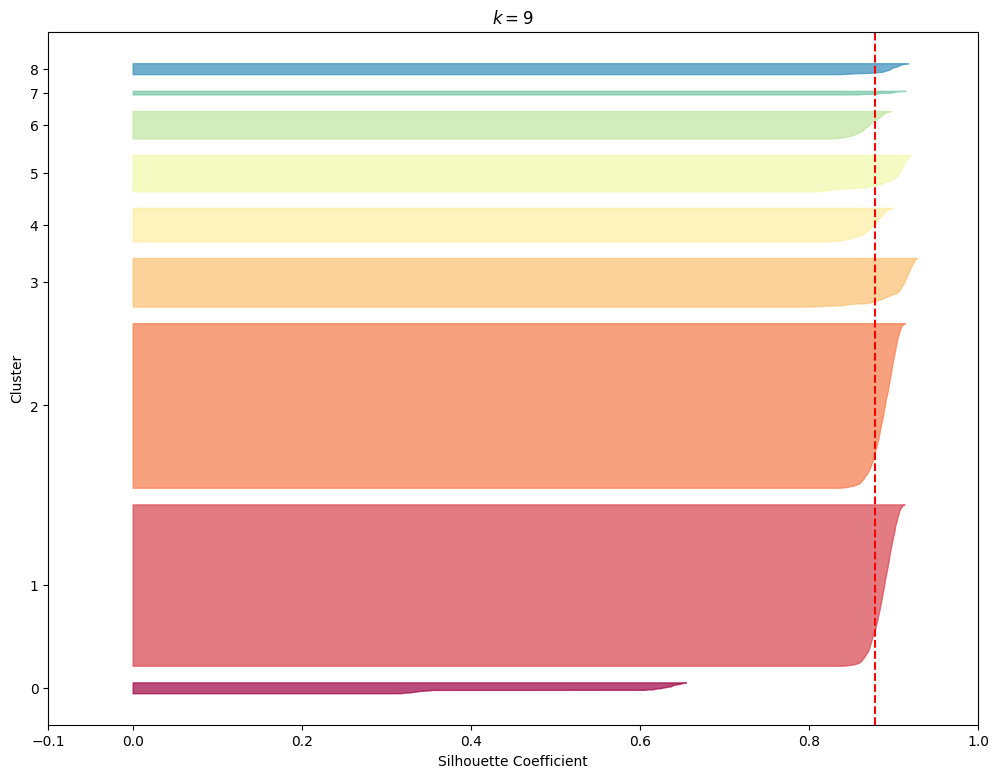

In [19]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(12, 9))

y_pred = model.labels_
silhouette_coefficients = silhouette_samples(gower_distance, y_pred, metric = 'precomputed')

padding = len(y_pred) // 30
pos = padding
ticks = []
for i in range(k):
    coeffs = silhouette_coefficients[y_pred == i]
    coeffs.sort()

    color = plt.cm.Spectral(i / k)
    plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ticks.append(pos + len(coeffs) // 2)
    pos += len(coeffs) + padding

plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

plt.ylabel("Cluster")


plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.xlabel("Silhouette Coefficient")


plt.axvline(x=search.best_score_, color="red", linestyle="--")
plt.title(f"$k={k}$")

plt.show()

All clusters, aside form the first one, have observations with silhouette samples that are above the average silhouette score. About the third one we will decide in the business analysis if it is useful or not.

## Clusters visualization through tSNE

Let's use tSNE to visualize our clusters in three dimensions:

In [20]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 3, init="random", learning_rate="auto", random_state=rs, metric = 'precomputed')
X_reduced_tsne = tsne.fit_transform(gower_distance)

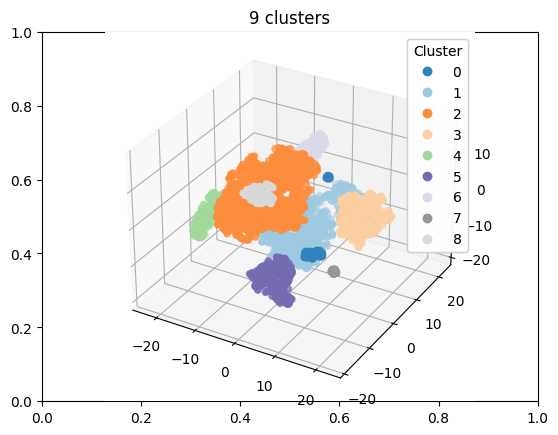

In [21]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

def tsne_plot(data, model, n_clusters):
    x, y, z = list(zip(*data))
    fig = pylab.figure()
    plt. title(f'{n_clusters} clusters')
    
    ax = fig.add_subplot(111, projection = '3d')
    sc = ax.scatter(x,y,z, c = model.labels_, cmap = "tab20c")
    
    handles, labels = sc.legend_elements()
    legend = ax.legend(handles, labels, loc="upper right", title="Cluster")
    ax.add_artist(legend)

    plt.show()
    
tsne_plot(X_reduced_tsne, model, k)

The space looks well clustered, but how big are those clusters?

In [22]:
print(np.unique(model.labels_, return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64), array([  99, 1460, 1489,  440,  303,  328,  248,   33,  100], dtype=int64))


We have two big clusters and two very small clusters, in the business analysis we will see if they are important or not for our decision making.

# Business analysis

First we divide the anomalies from the good instances by creating two new datasets based on the dataset for visualization created before, then we create some pie plots to characterize the clusters:

In [23]:
dfba = dfN.iloc[X_train.index].copy()
dfba["ClusterKMedoids"] = model.labels_+1

## Pie Plots of categorical variables

First let's see the pie plots of the categories in the original train set:

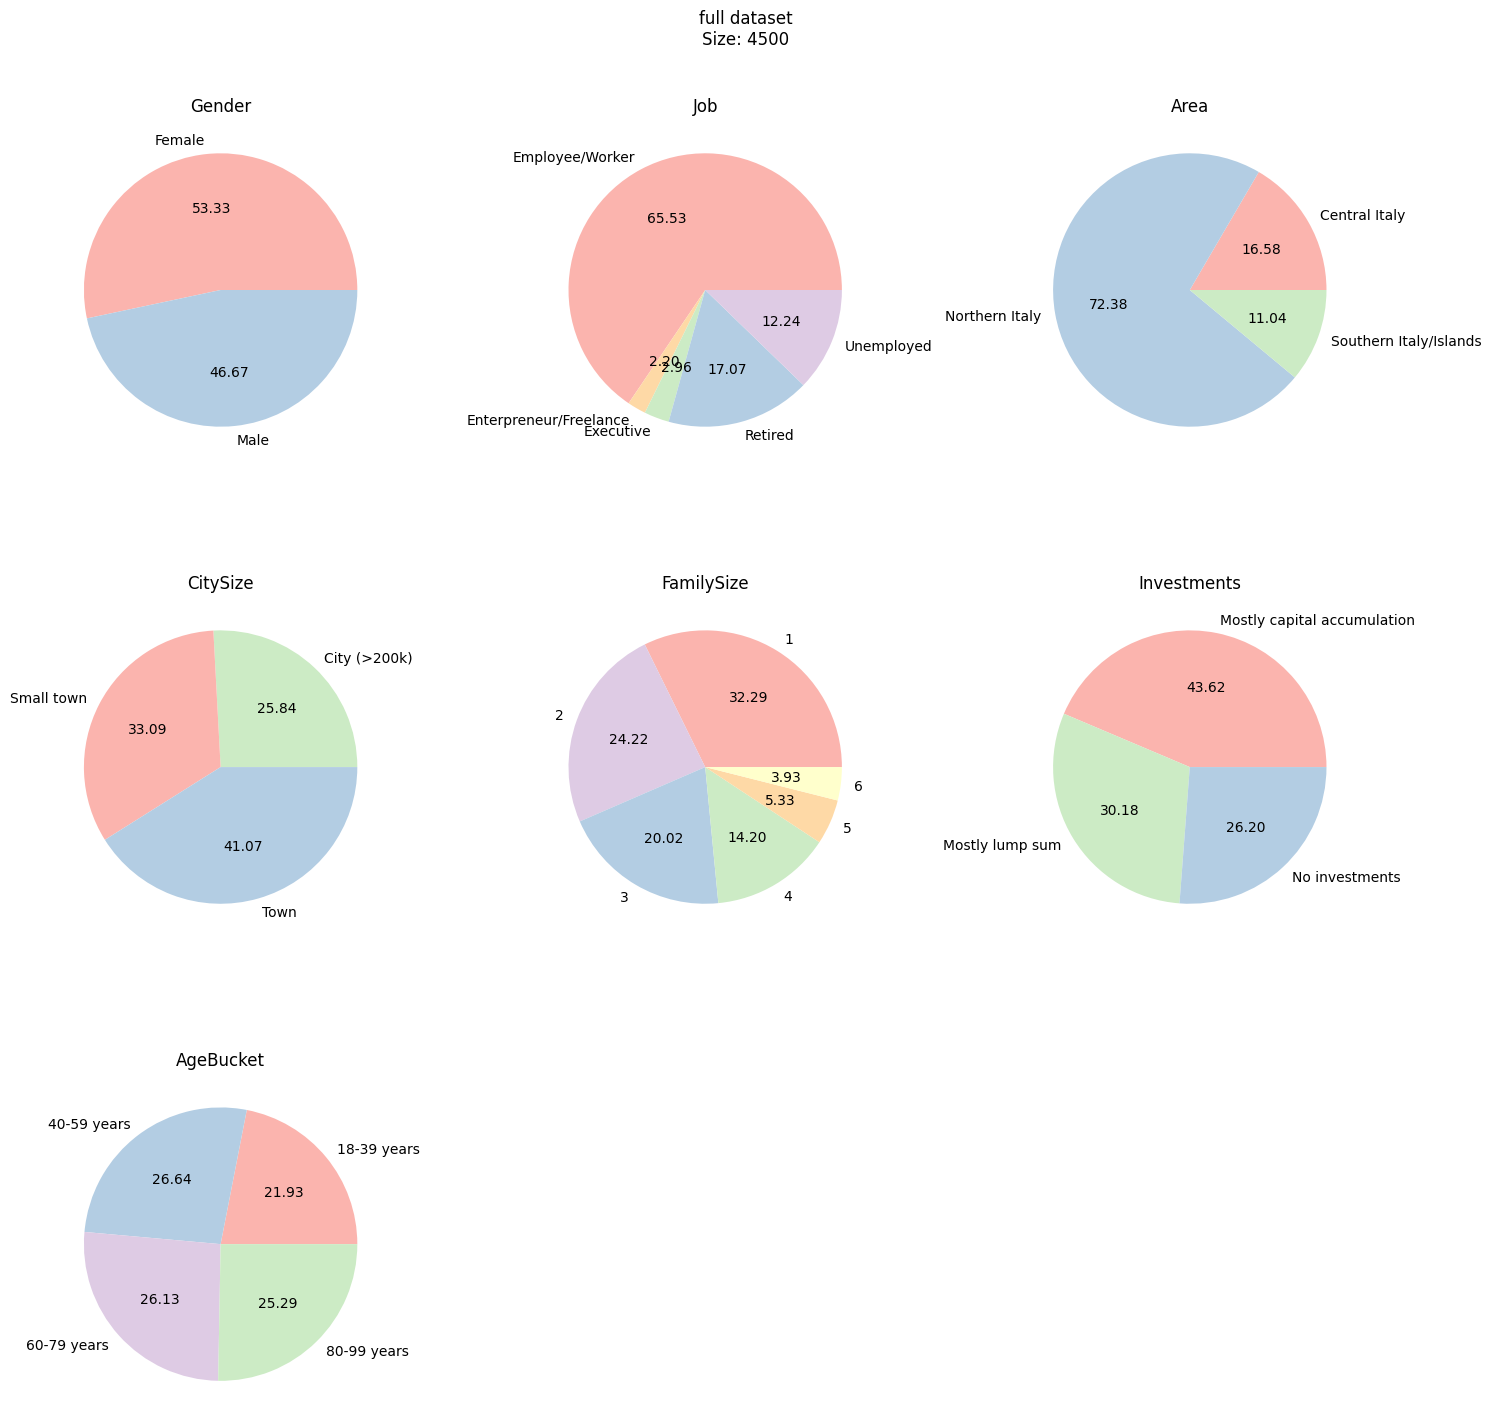

In [24]:
colors_list = sns.color_palette("Pastel1").as_hex()
fig, ax = plt.subplots(3,3, figsize = (15,15))
ax[2,1].set_visible(False)
ax[2,2].set_visible(False)


for i,feature in enumerate(categorical):
    labels = dfba[feature].unique()
    colors_dict = dict(zip(labels, colors_list[:len(labels)]))
        
    group = dfba.groupby(feature)
    c = [colors_dict[a] for a in list(group.indices.keys())]
    group.size().plot(kind='pie', autopct='%.2f', ax = ax[i//3, i-3*(i//3)], colors =c)
    ax[i//3, i-3*(i//3)].set_title(feature)
    
fig.suptitle(f'full dataset\nSize: {dfba.shape[0]}')          
plt.tight_layout()
plt.show()

Now we plot for each feature each cluster pie plot:

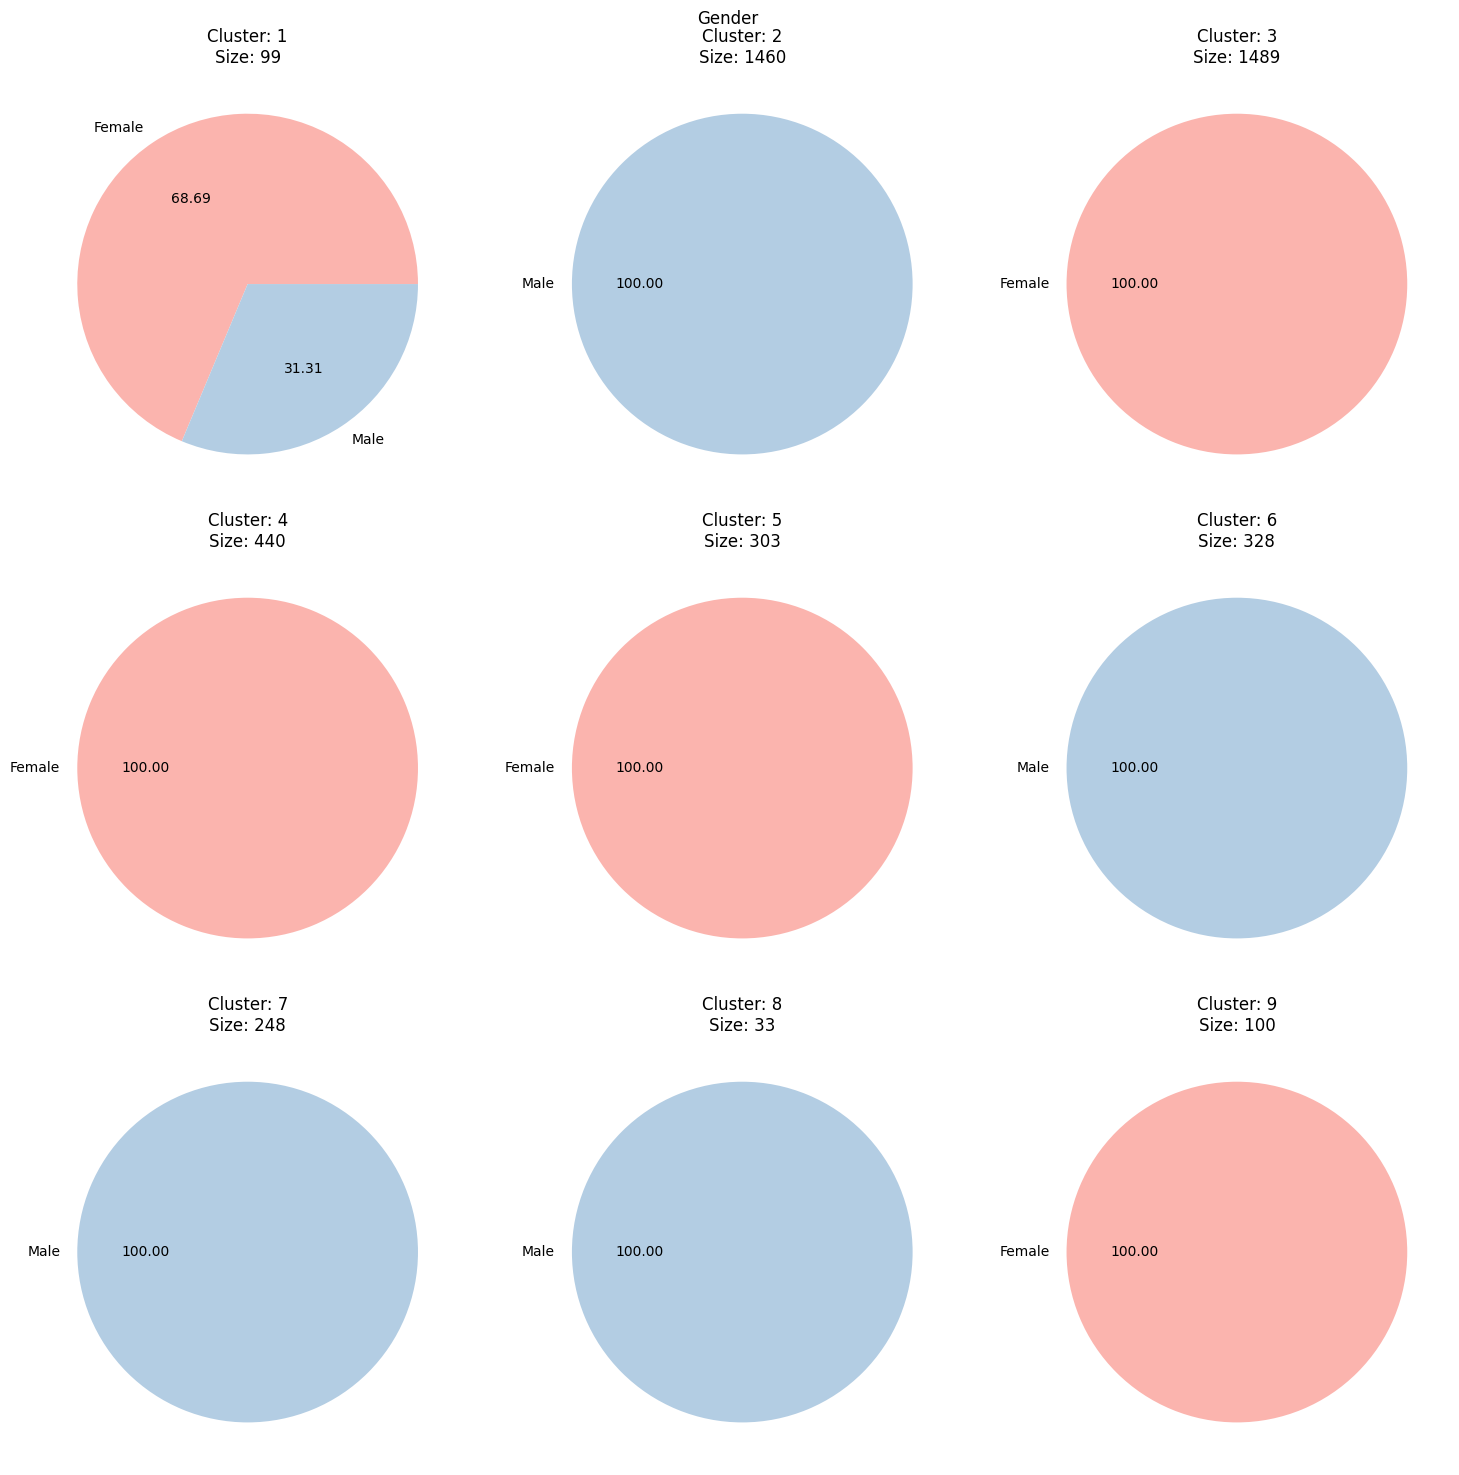

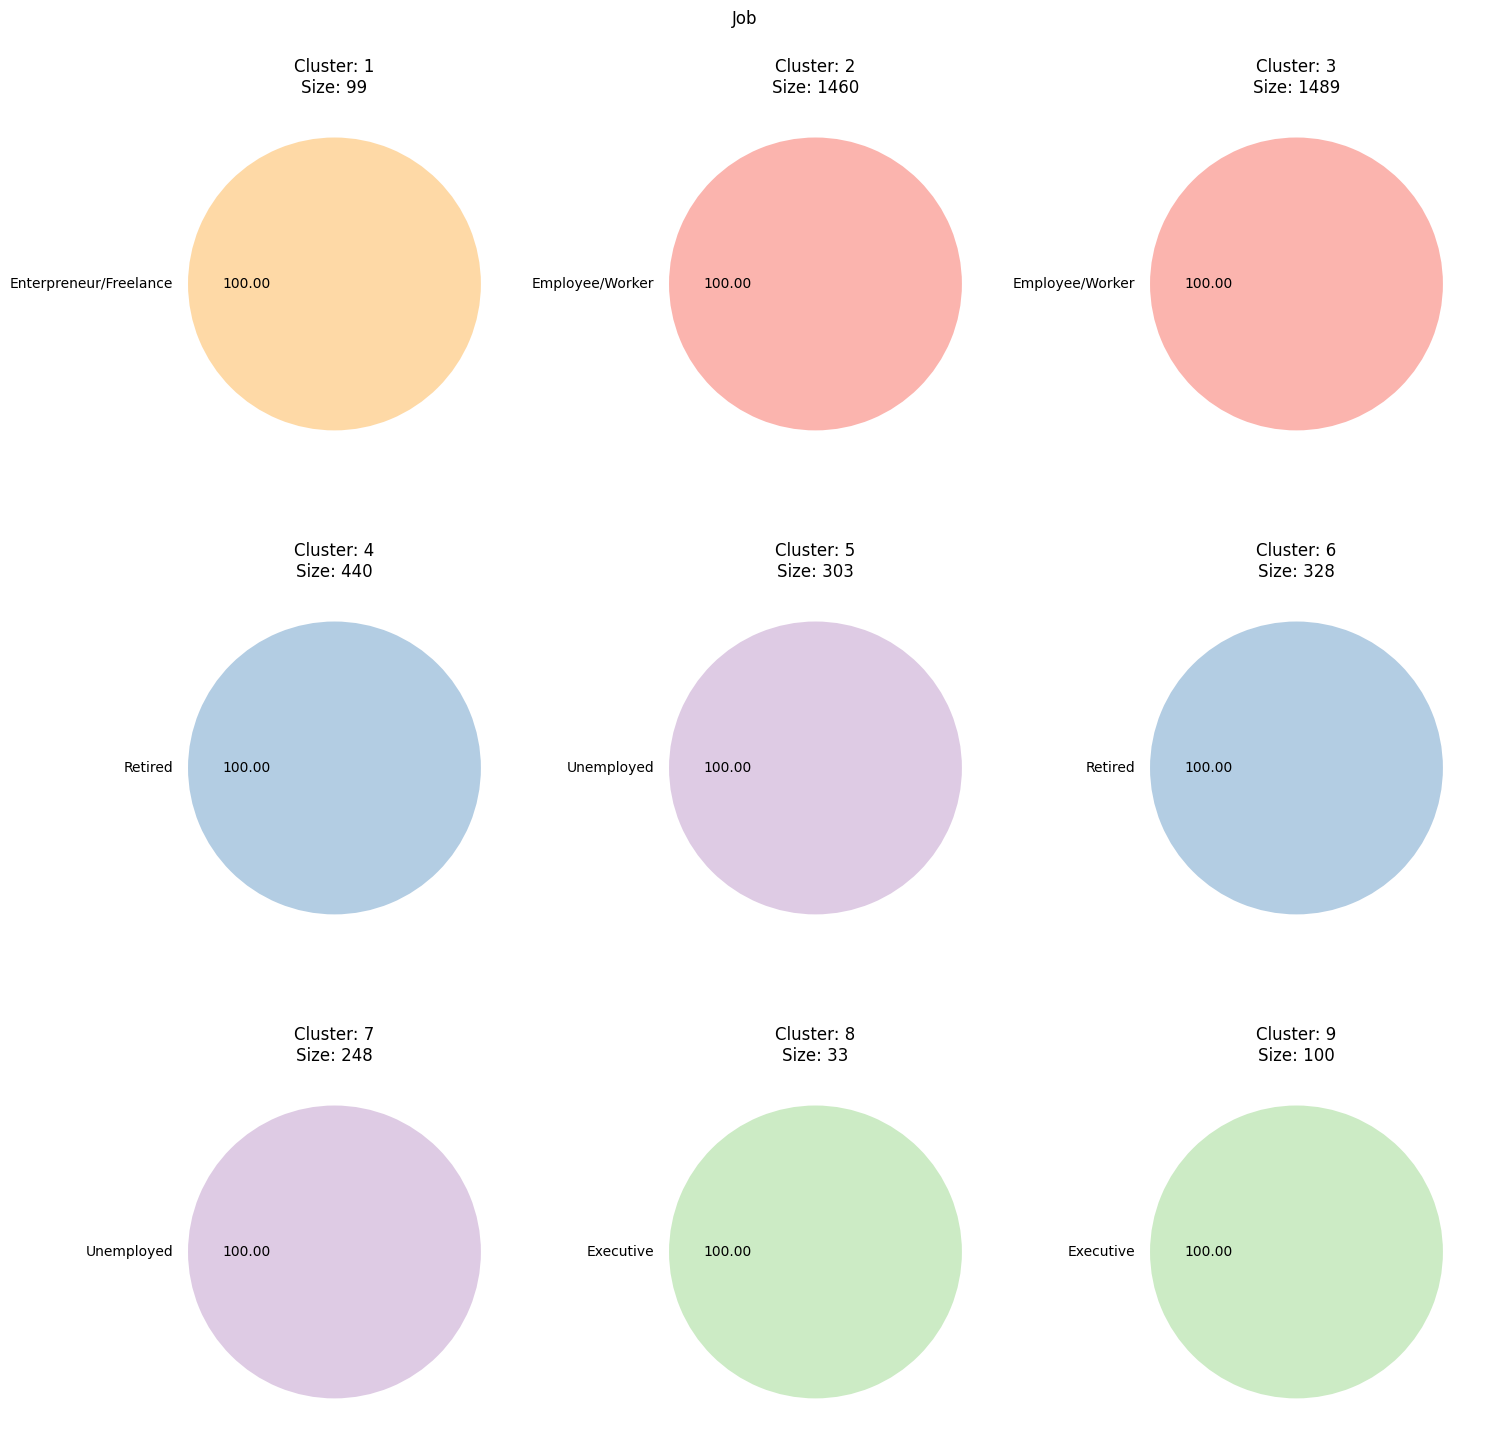

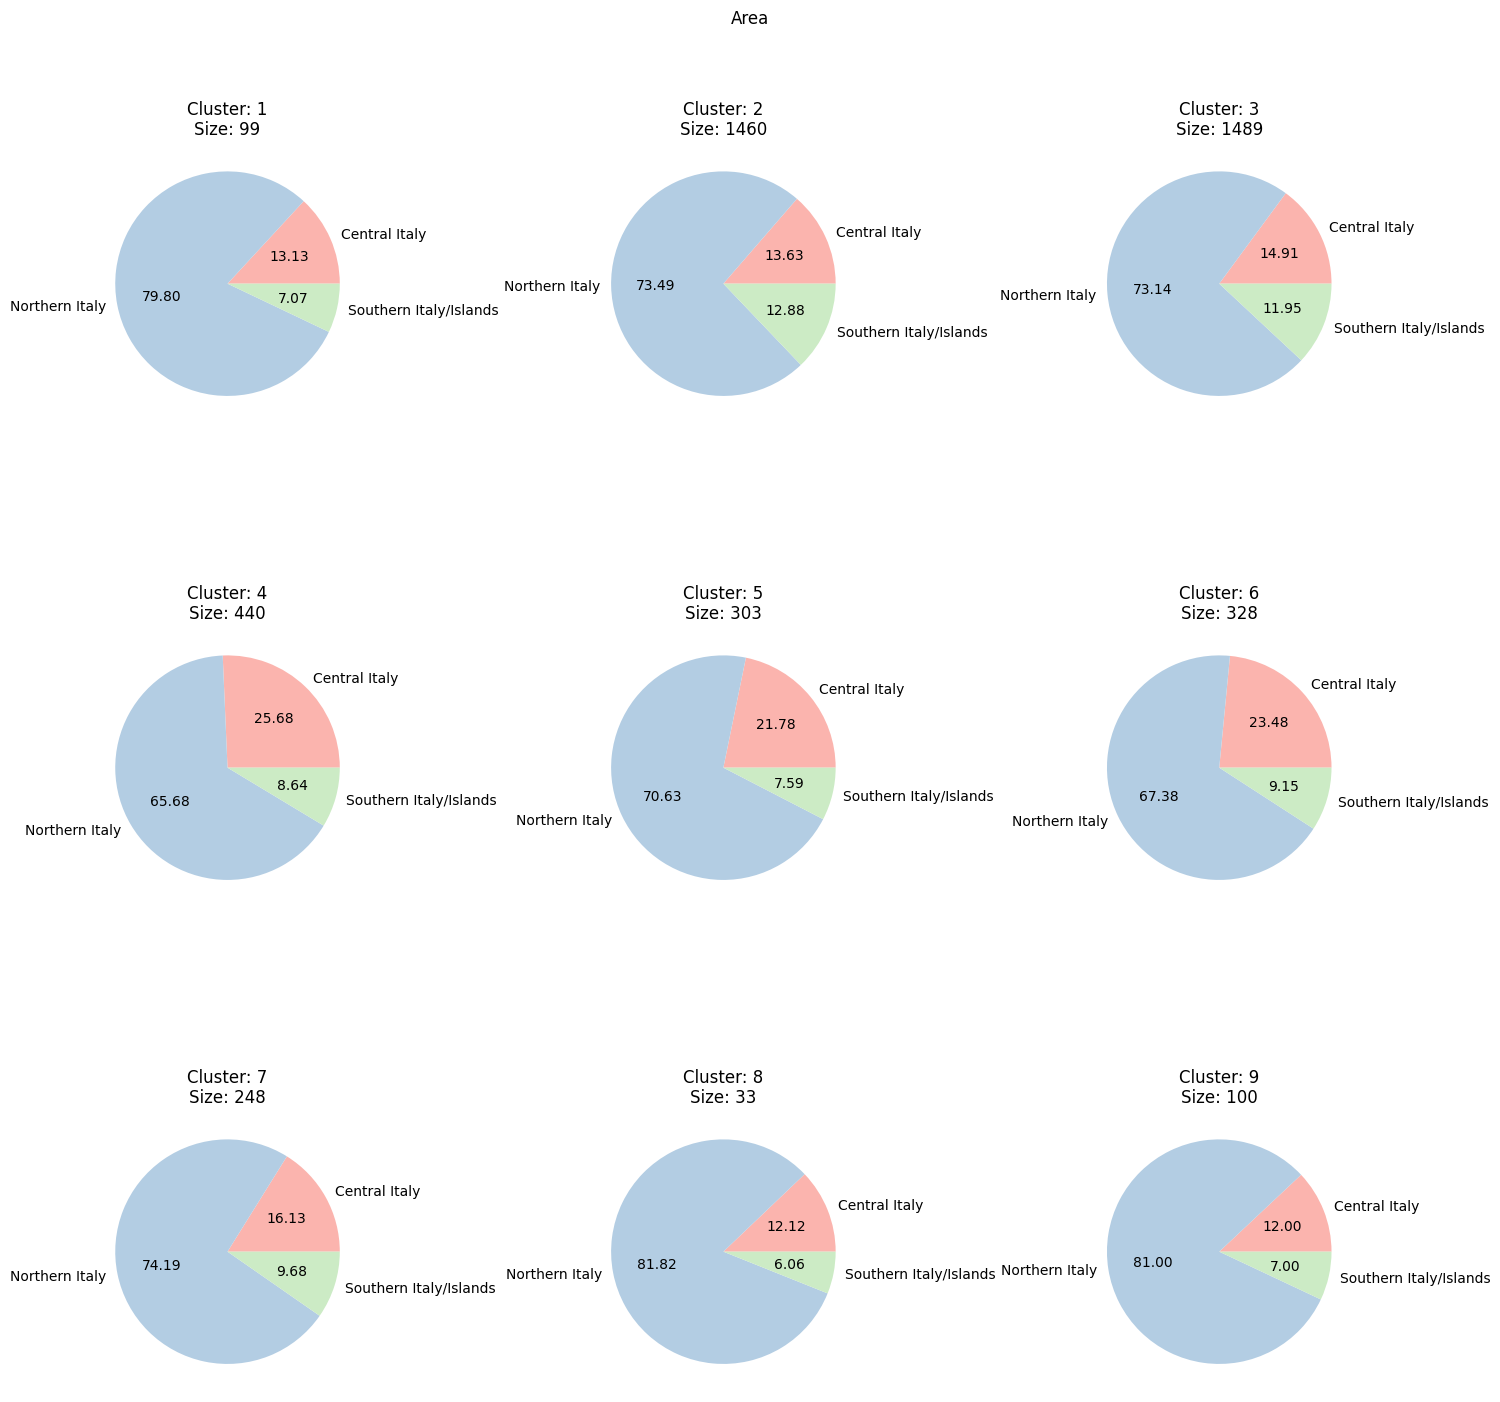

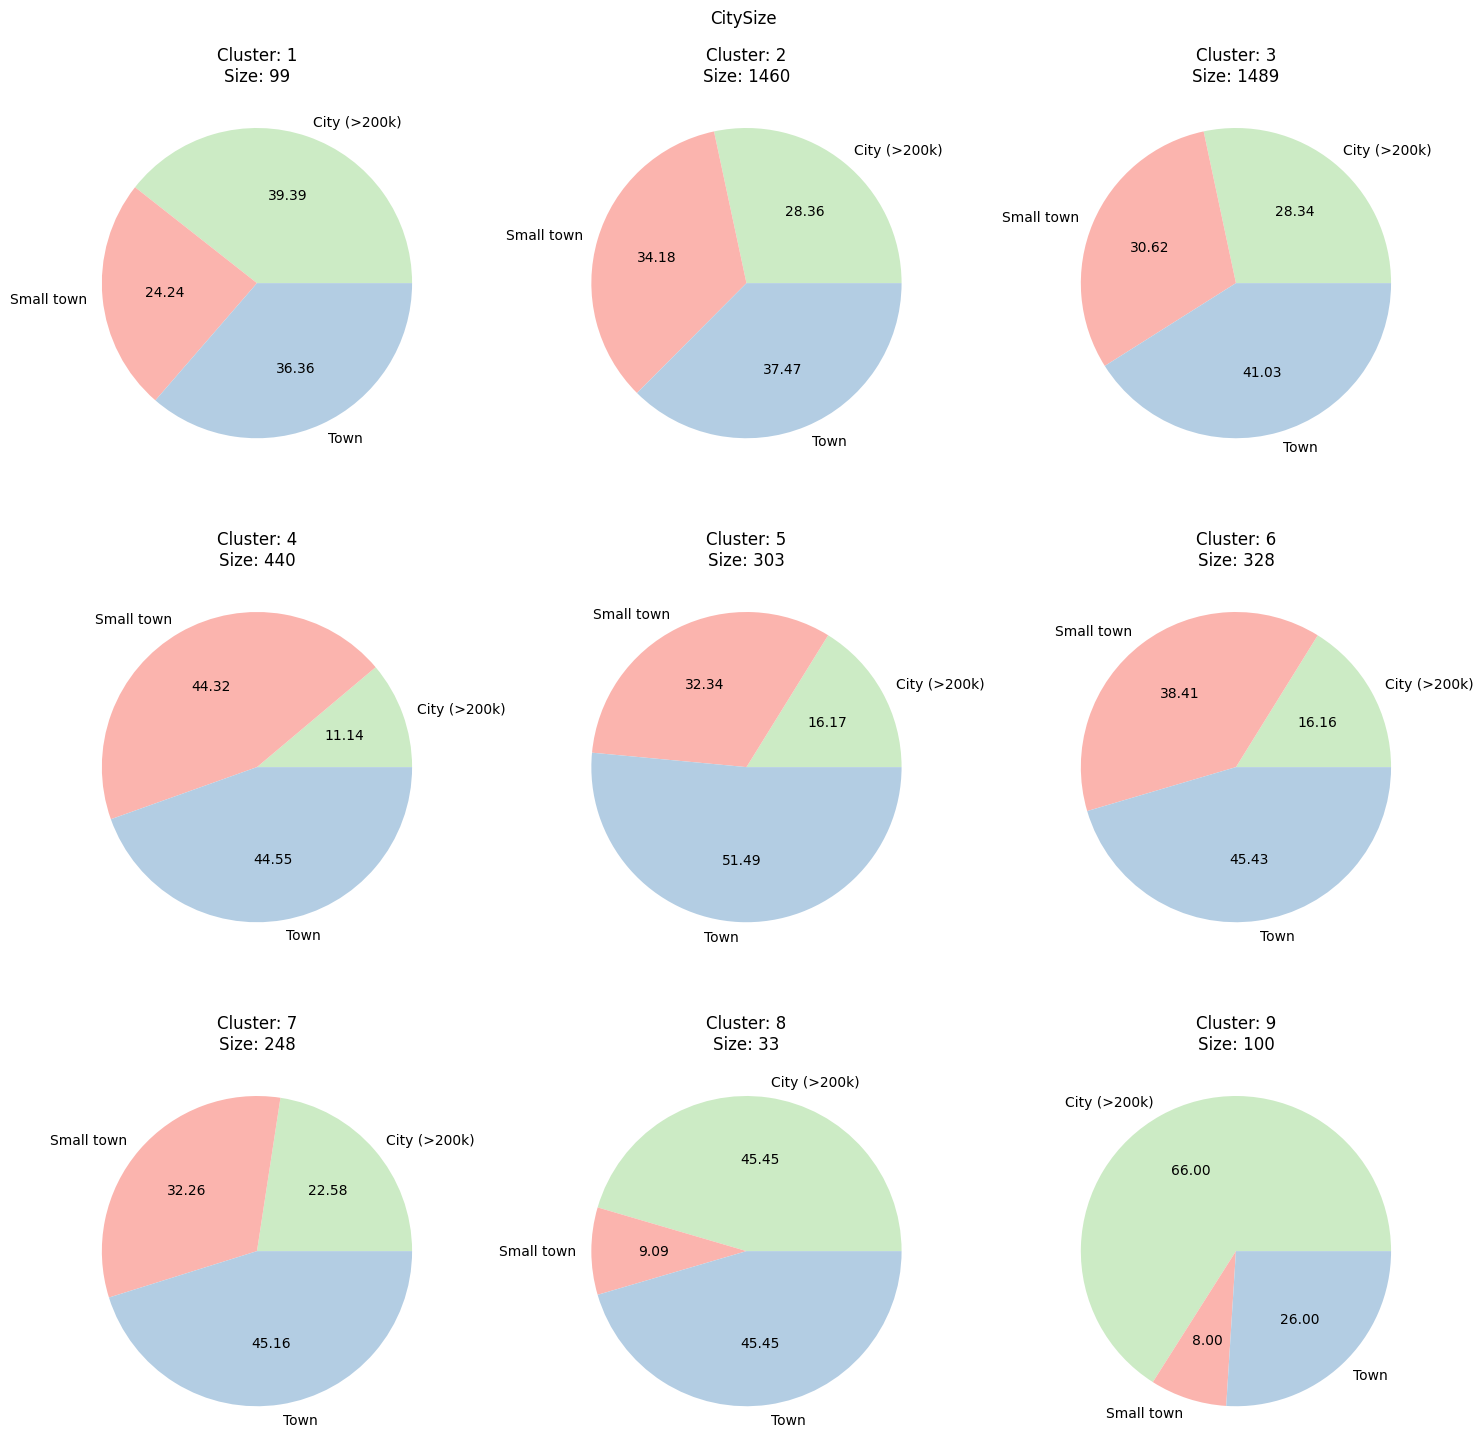

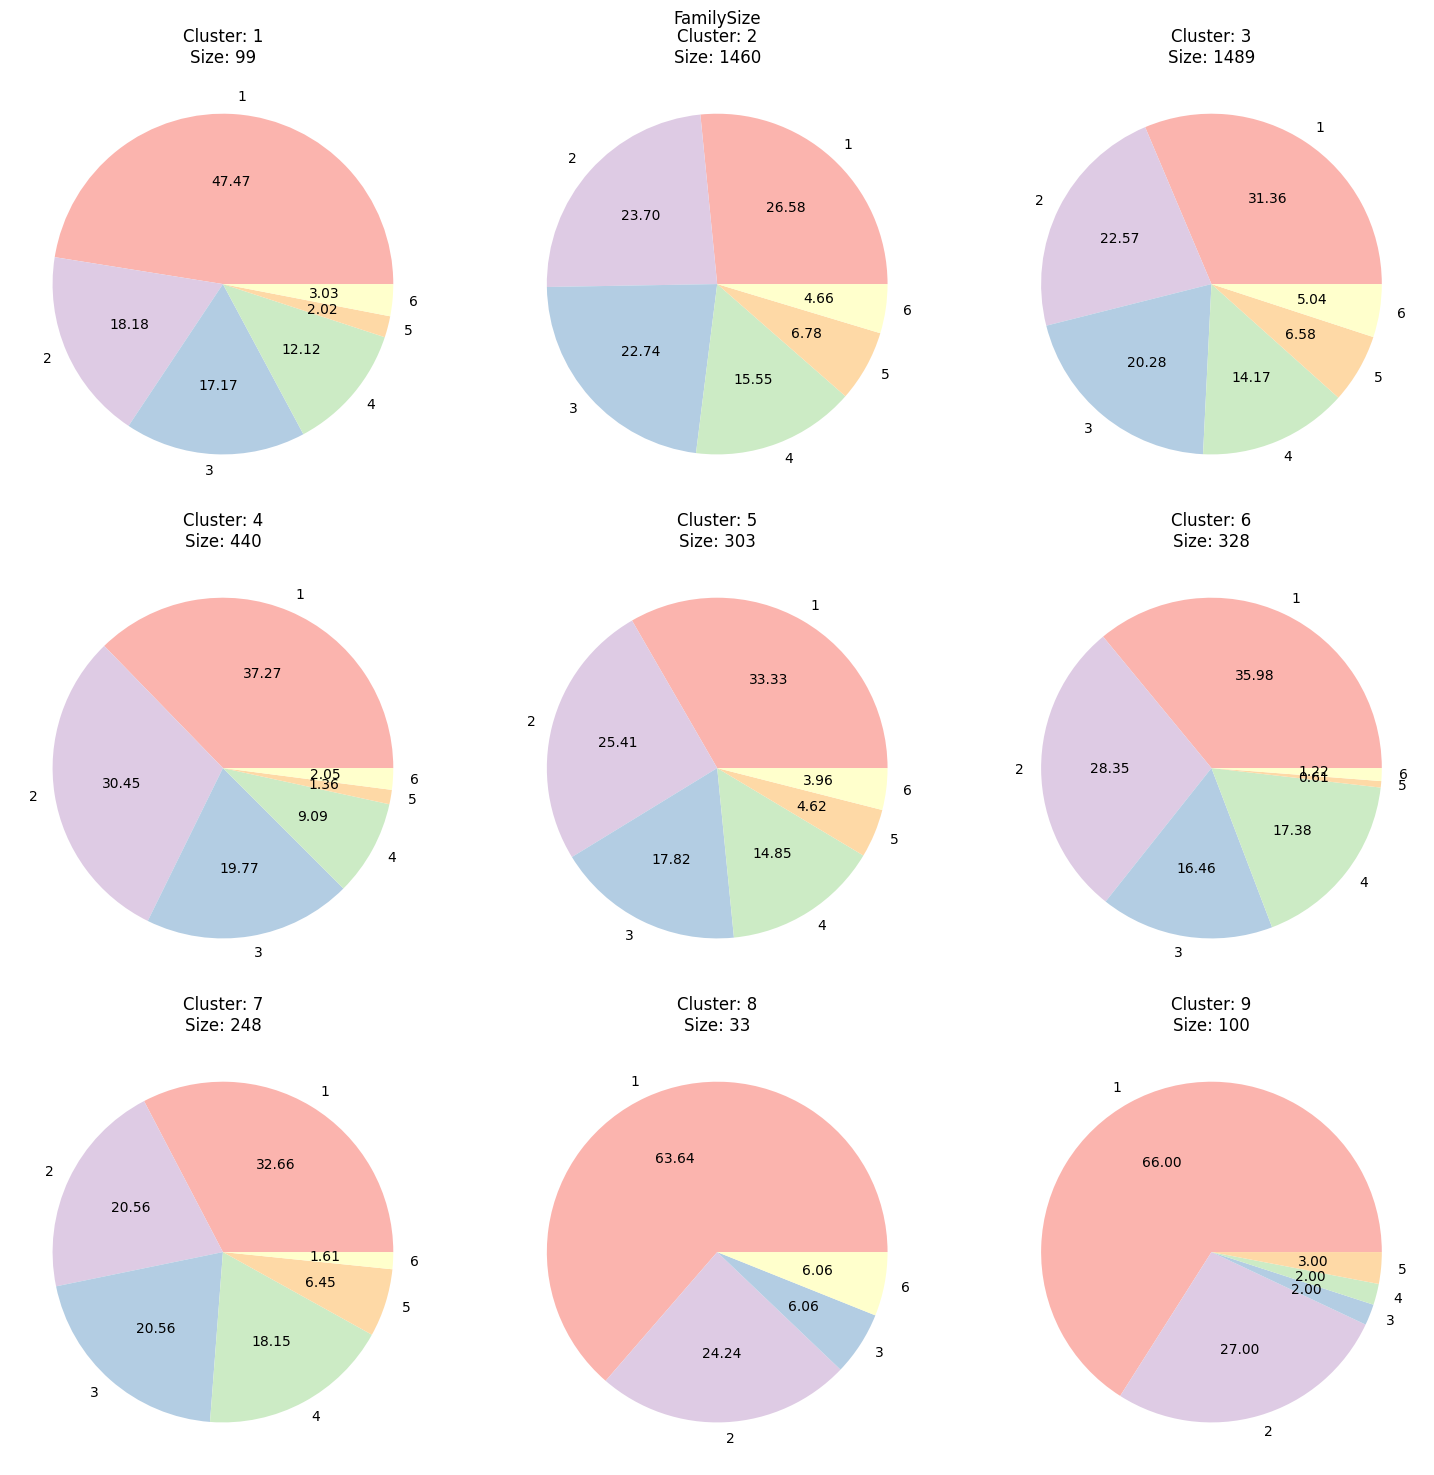

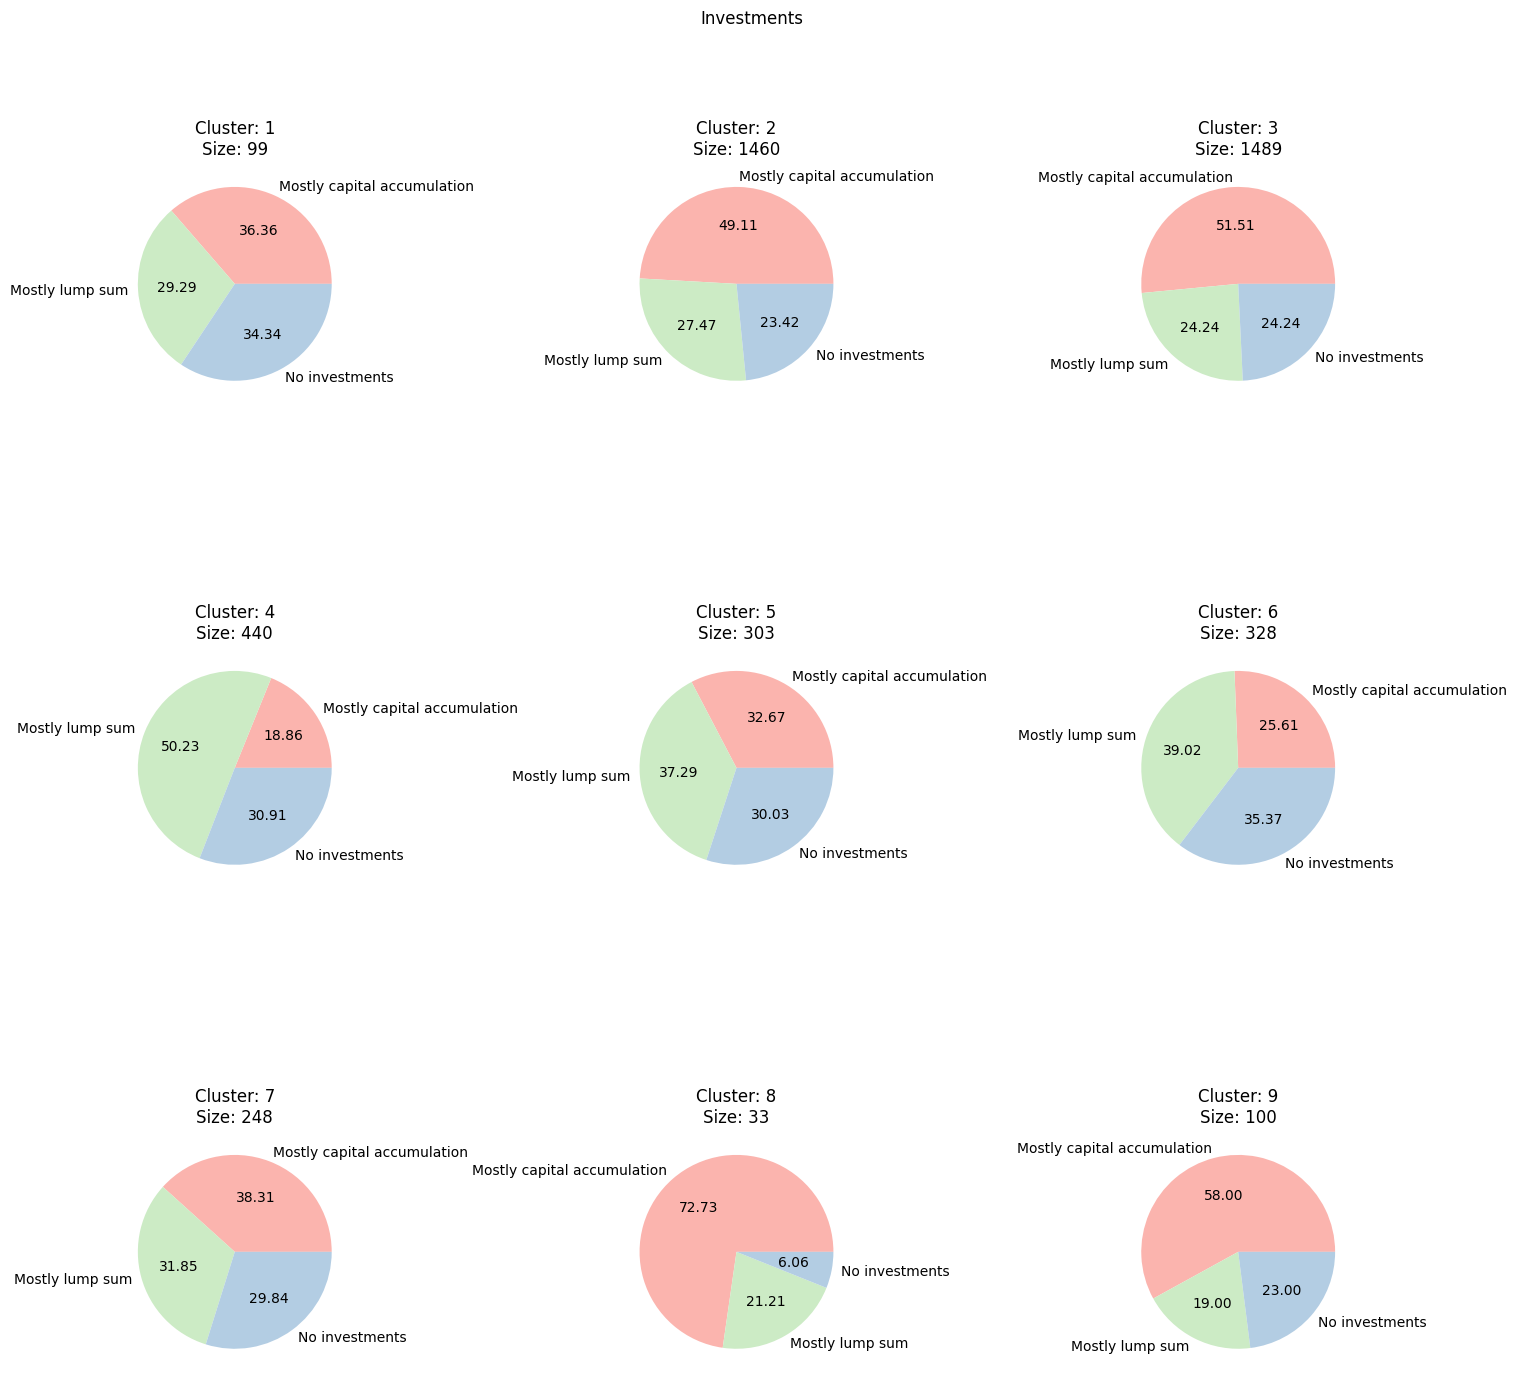

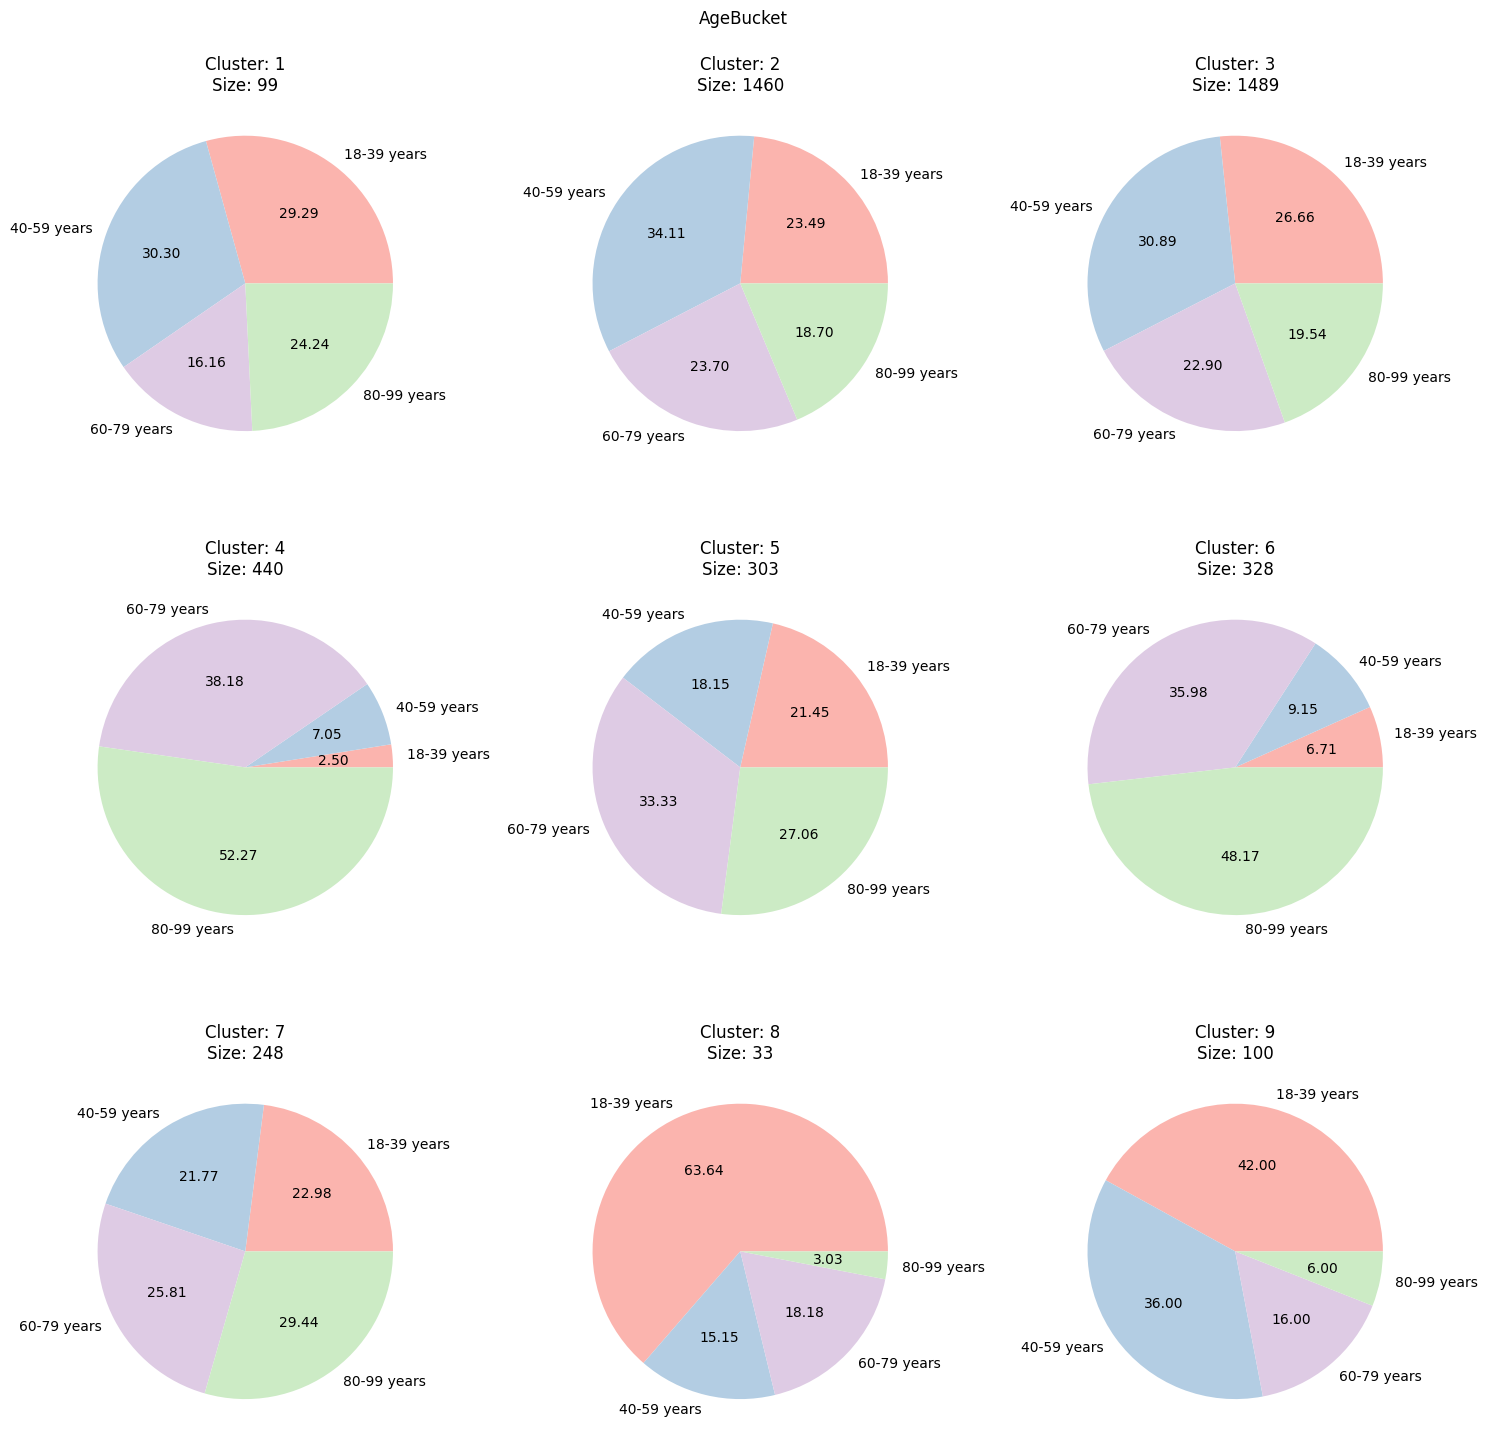

In [25]:
colors_list = sns.color_palette("Pastel1").as_hex()

for feature in categorical:
    fig, ax = plt.subplots(3,3, figsize = (15,15))
    fig.suptitle(feature)
    
    labels = dfba[feature].unique()
    colors_dict = dict(zip(labels, colors_list[:len(labels)]))
        
    for i in range(k):        
        group = dfba[dfba["ClusterKMedoids"] == i+1].groupby(feature)
        c = [colors_dict[a] for a in list(group.indices.keys())]
        group.size().plot(kind='pie', autopct='%.2f', ax = ax[i//3, i-3*(i//3)], colors = c)
        ax[i//3, i-3*(i//3)].set_title(f'Cluster: {i+1}\nSize: {dfba[dfba["ClusterKMedoids"] == i+1].shape[0]}')
            
    plt.tight_layout()
    plt.show()

As first thing we notice that the most influent categories are gender and job, followed by AgeBucket; the others are less influential so we will highlight only the particular cases and when the cluster category distribution deviates from the one of the full dataset.

### Summary of the clusters division for categorical variables:

- Cluster 1: **Mostly Female - Enterpreneur/Freelance - Mostly under 60** - Living alone in cities of northern Italy
- Cluster 2: **Male - Employee/Worker - Mostly under 60** - mostly capital accumulation investments
- Cluster 3: **Female - Employee/Worker - Mostly under 60** - mostly capital accumulation investments
- Cluster 4: **Female - Retired - Over 60 - Mostly in town/small town** - high appearence of central italy - high appearence of lump sums investments
- Cluster 5: **Female - Unemployed - Over 60 - Mostly in town/small town**
- Cluster 6: **Male - Retired - Over 60 - Mostly in town/small town** - high appearence of central italy - high appearence of lump sums investments
- Cluster 7: **Male - Unemployed**
- Cluster 8: **Male - Executive - Under 40** - Living alone in cities of northern Italy - mostly capital accumulation investments
- Cluster 9: **Male - Executive - Under 60** - Living alone in cities of northern Italy - mostly capital accumulation investments

We notice that clusters (2,3),(4,6),(8,9) are very similar between themselves, being different just for the Gender variable, but is it so much influent when segmentating the customers of a bank? let's look at the continous variable per cluster in order to give an answer.

## BoxPlot for continous variables

We add a line at the average value of the feautures:

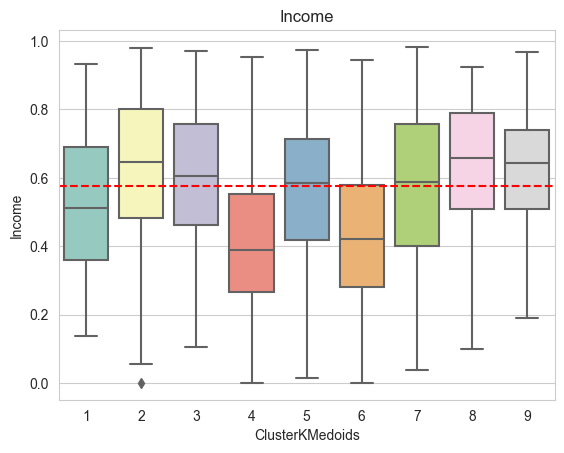

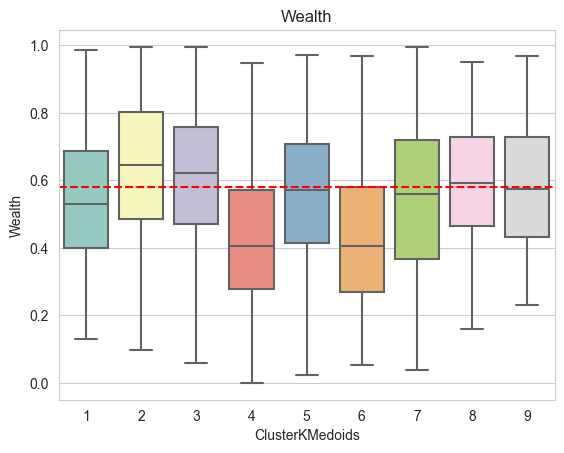

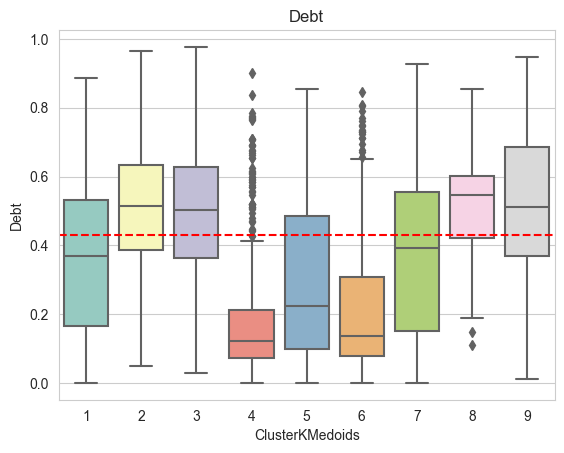

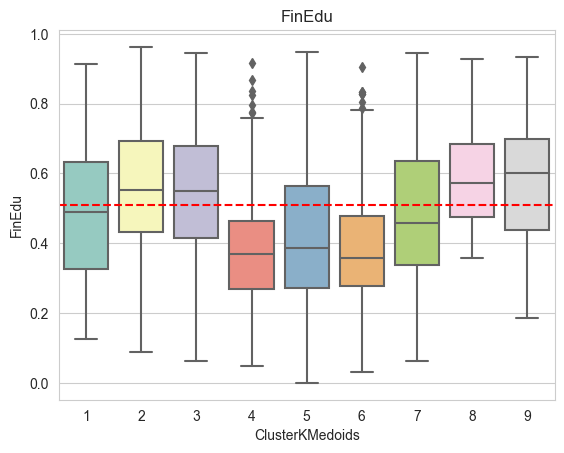

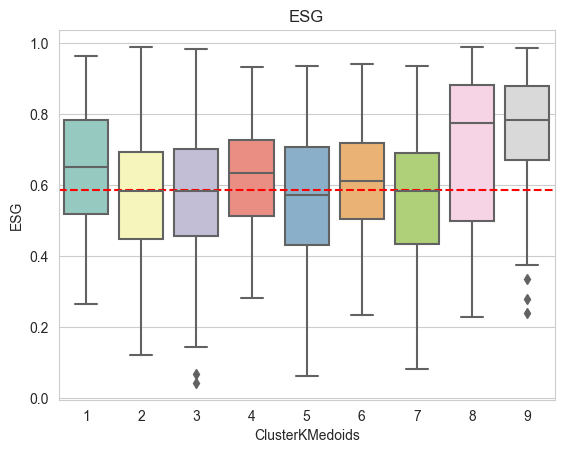

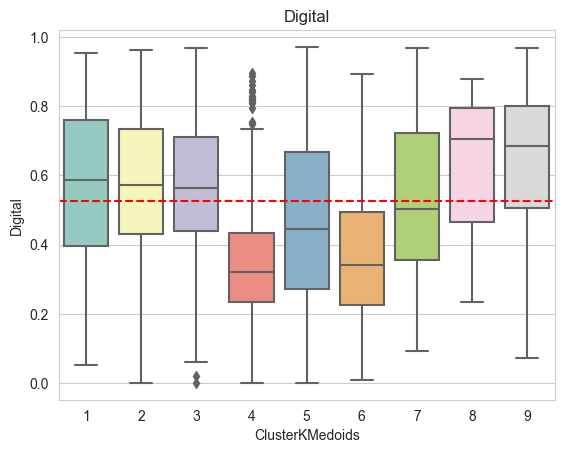

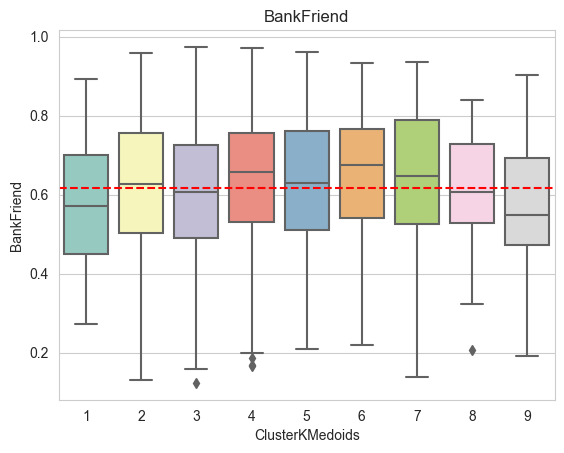

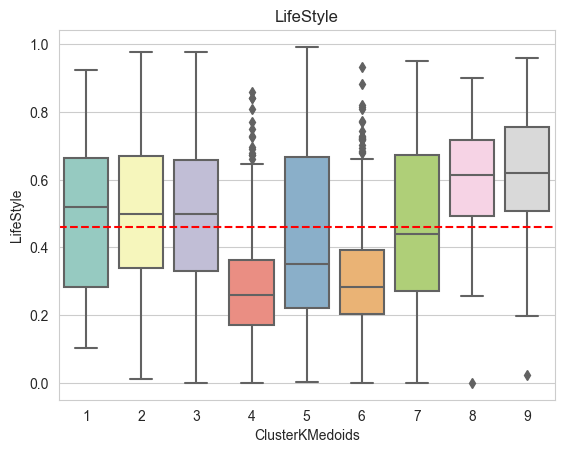

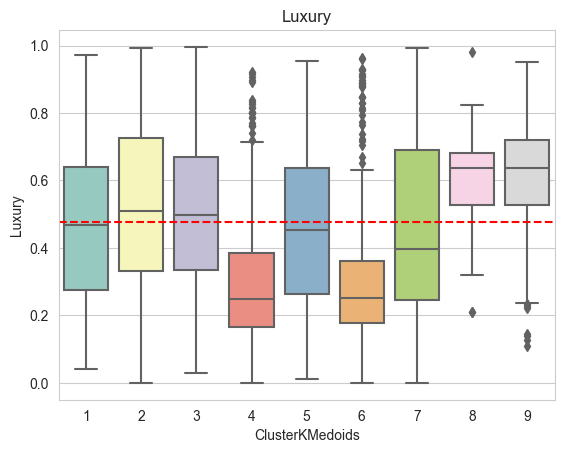

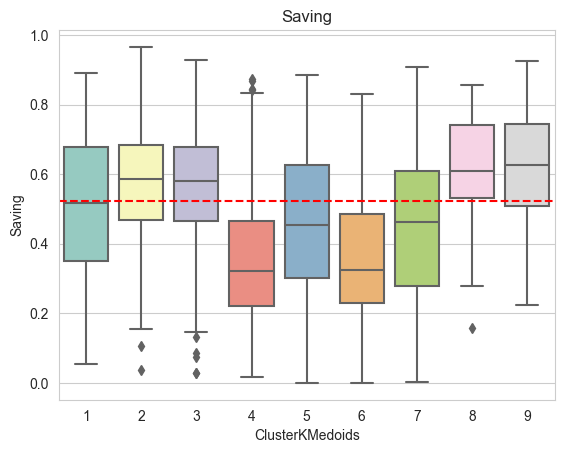

In [26]:
sns.set_style("whitegrid")
for feature in continous:
    plt.title(feature)
    sns.boxplot(x= "ClusterKMedoids", y = feature, data = dfba, palette="Set3")
    plt.axhline(y=dfba[feature].mean(), color='r', linestyle='--')
    plt.show()

We can see that the distribution of the numerical features inside the clusters is very different between clusters and as expected the category with high paying jobs are richer as shown in the continous features.

In the previously cited similar clusters (2,3),(4,6),(8,9) we have that the Male clusters are slightly richer, but this sholdn't be a big difference from a bank's perspective, hence we could sum up the results into 6 clusters, given by:

### Final cluster proposal from a business perspective:

- Cluster 1: **Enterpreneur/Freelance - Mostly under 60** - Living alone in cities of northern Italy
- Cluster 2: **Employee/Worker - Mostly under 60** - mostly capital accumulation investments
- Cluster 3: **Retired - Over 60 - Mostly in town/small town** - high appearence of central italy - high appearence of lump sums investments
- Cluster 4: **Female - Unemployed - Over 60 - Mostly in town/small town**
- Cluster 5: **Male - Unemployed**
- Cluster 6: **Executive - Under 60** - Living alone in cities of northern Italy - mostly capital accumulation investments


# Evaluation on the test set

In [28]:
print(silhouette_scorer(search.best_estimator_,X_test))

0.8806379


As we can see the performance on the test set is still very good, actually the silhouette scores its higher than te cross-validation estimate.